# Colour - Demosaicing - Examples: Bayer

This notebook showcase various *Bayer* CFA (Colour Filter Array) related examples.

> Note: All the showcased objects support an optional **pattern** argument specifying the arrangement of the colour filters on the pixel array: **'RGGB', 'BGGR', 'GRBG', 'GBRG'**

In [22]:
import os

import colour

from colour_demosaicing import (
    ROOT_RESOURCES_EXAMPLES,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC    *
*   v.1934 64 bit (AMD64)]                                                    *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.2                                                        *
*       colour-demosaicing : 0.2.3                                            *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.25.1                                                      *
*       matplotlib : 3.6.2                                                    *
*       numpy : 1.24.0                  

## Data

C:\Users\fhs49456\AppData\Roaming\Python\Python310\site-packages\colour\utilities\verbose.py:266: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


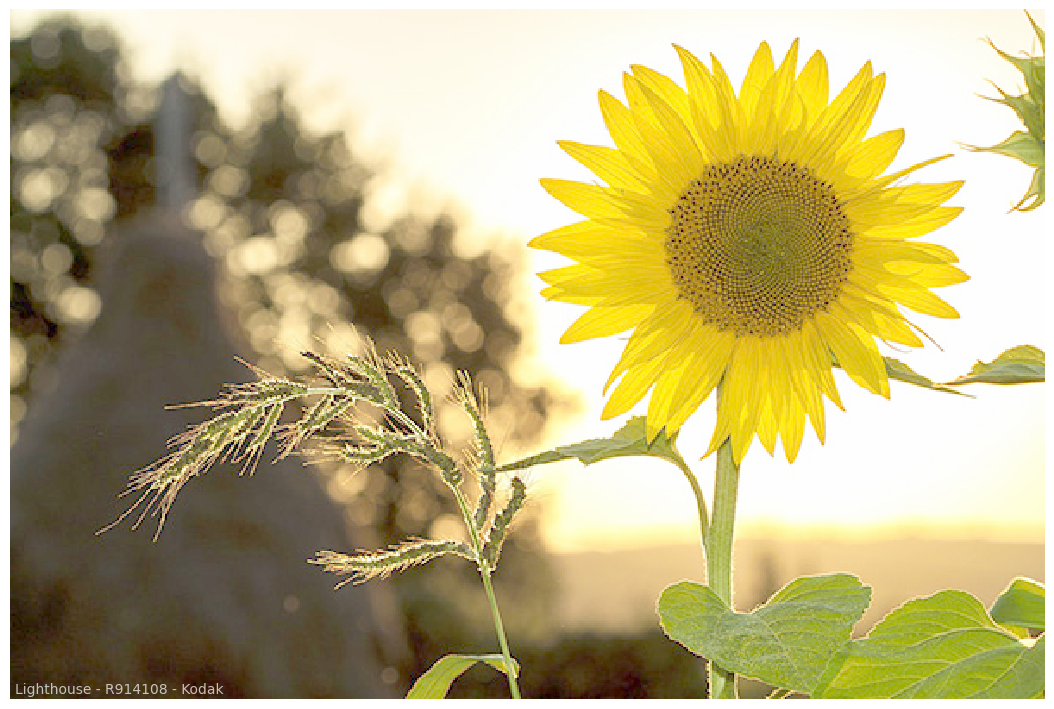

In [23]:
LIGHTHOUSE_IMAGE = colour.io.read_image(
    os.path.join(ROOT_RESOURCES_EXAMPLES, 'bayer', 'img.jpg'))

colour.plotting.plot_image(
    colour.cctf_encoding(LIGHTHOUSE_IMAGE),
    text_kwargs={'text': 'Lighthouse - R914108 - Kodak'});

## Mosaicing

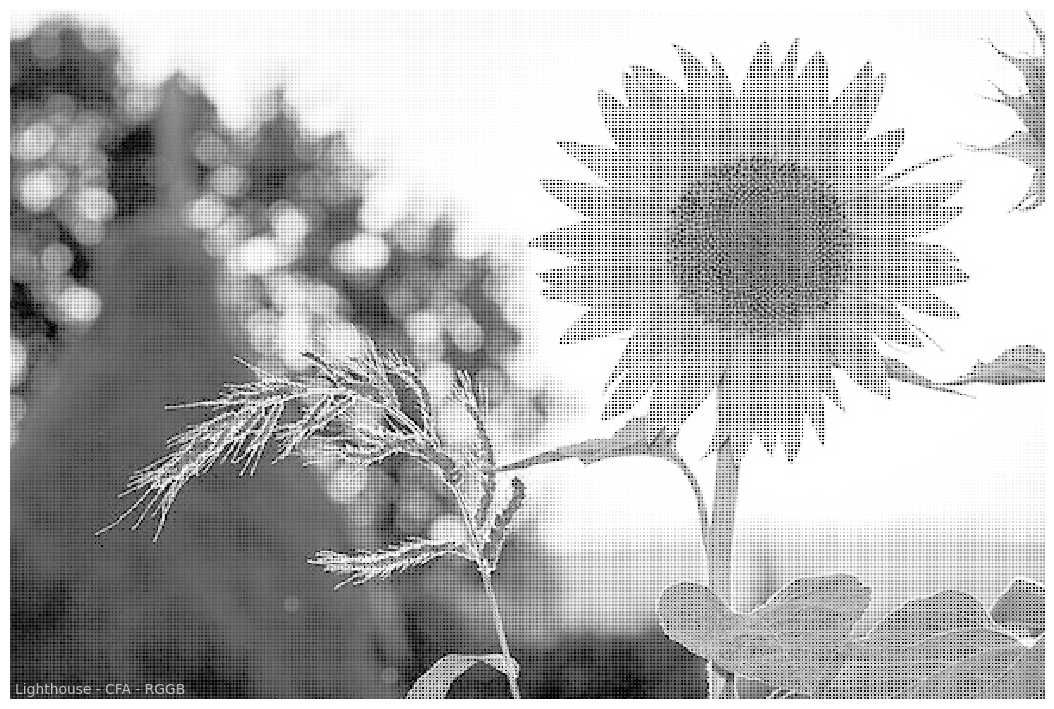

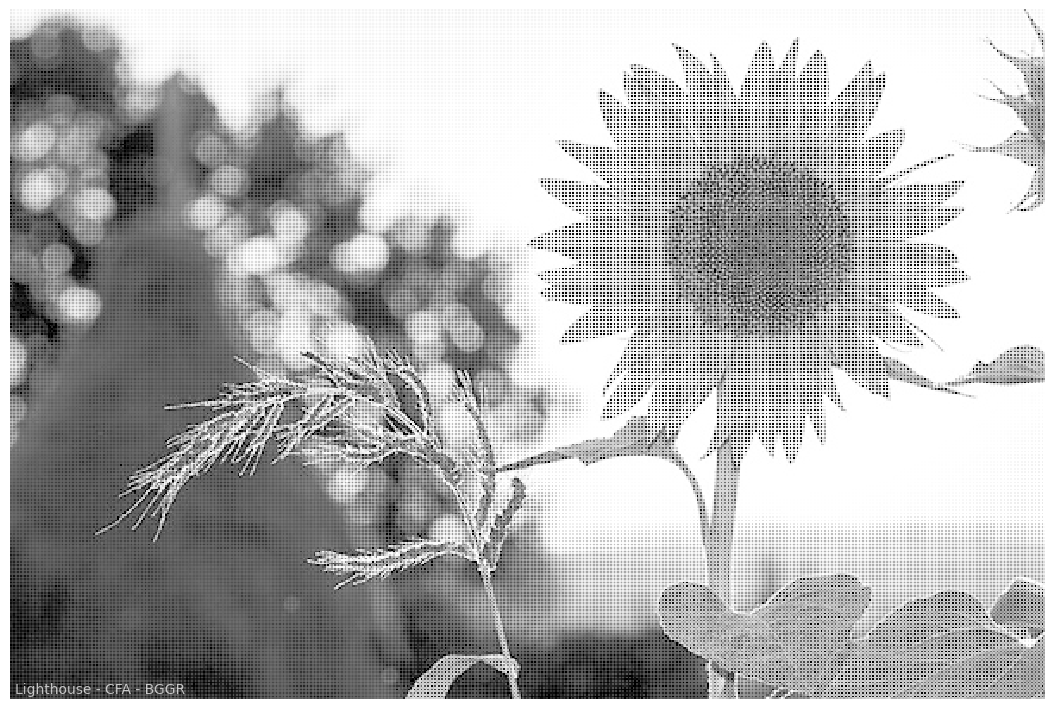

In [24]:
CFA = mosaicing_CFA_Bayer(LIGHTHOUSE_IMAGE)

colour.plotting.plot_image(
    colour.cctf_encoding(CFA),
    text_kwargs={'text': 'Lighthouse - CFA - RGGB'})

colour.plotting.plot_image(
    colour.cctf_encoding(mosaicing_CFA_Bayer(LIGHTHOUSE_IMAGE, 'BGGR')), 
    text_kwargs={'text': 'Lighthouse - CFA - BGGR'});

In [25]:
CFA.shape

(400, 600)

## Demosaicing - Bilinear

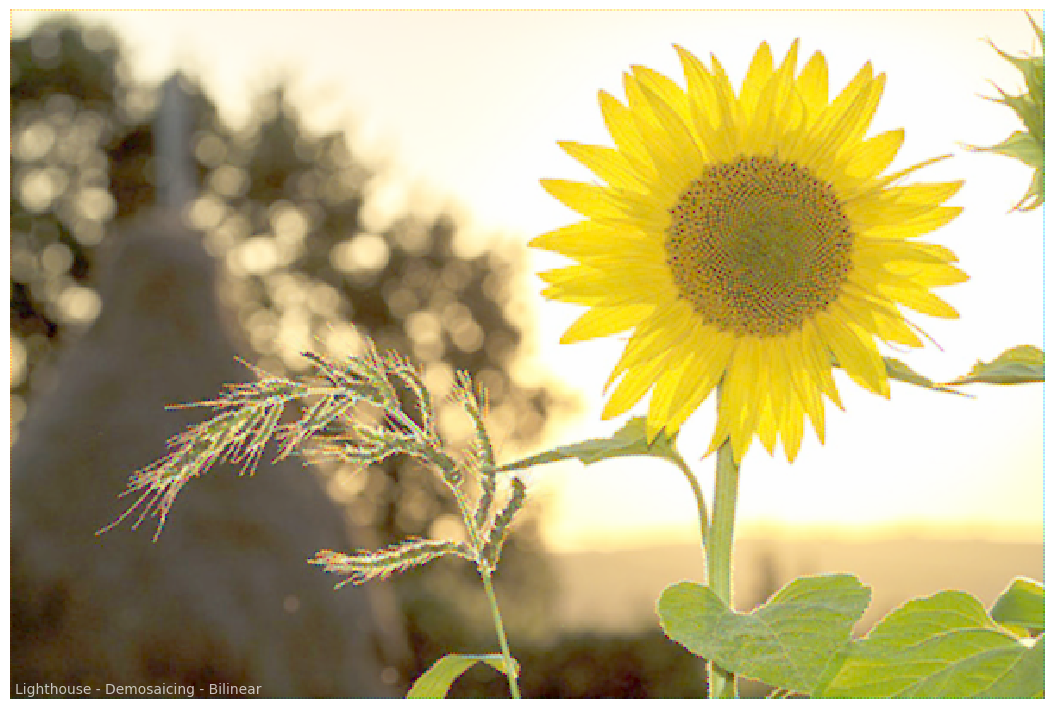

In [26]:
bil_rggb = demosaicing_CFA_Bayer_bilinear(CFA)

colour.plotting.plot_image(
    colour.cctf_encoding(bil_rggb), 
    text_kwargs={'text': 'Lighthouse - Demosaicing - Bilinear'});

In [27]:
# https://pyimagesearch.com/2014/09/15/python-compare-two-images/

import numpy as np

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [28]:
mse_rggb = mse(LIGHTHOUSE_IMAGE, bil_rggb)
print(mse_rggb)

0.00752958042942


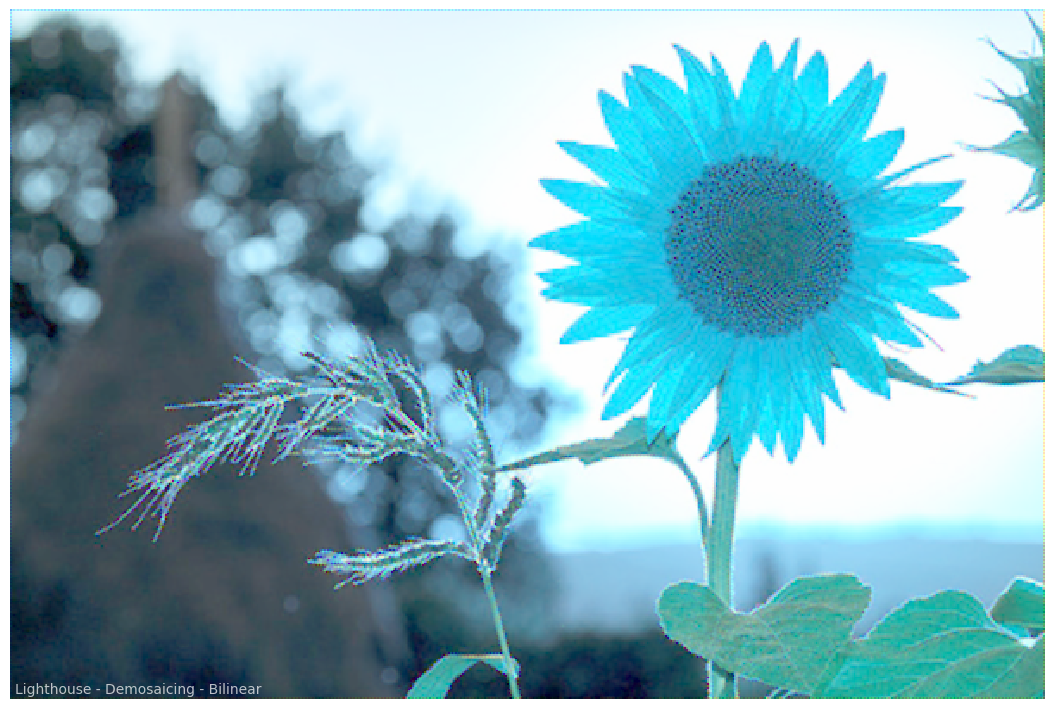

In [29]:
bil_bggr = demosaicing_CFA_Bayer_bilinear(CFA,"BGGR")

colour.plotting.plot_image(
    colour.cctf_encoding(bil_bggr), 
    text_kwargs={'text': 'Lighthouse - Demosaicing - Bilinear'});

In [30]:
mse_bggr = mse(LIGHTHOUSE_IMAGE, bil_bggr)
print(mse_bggr)

0.301773097099


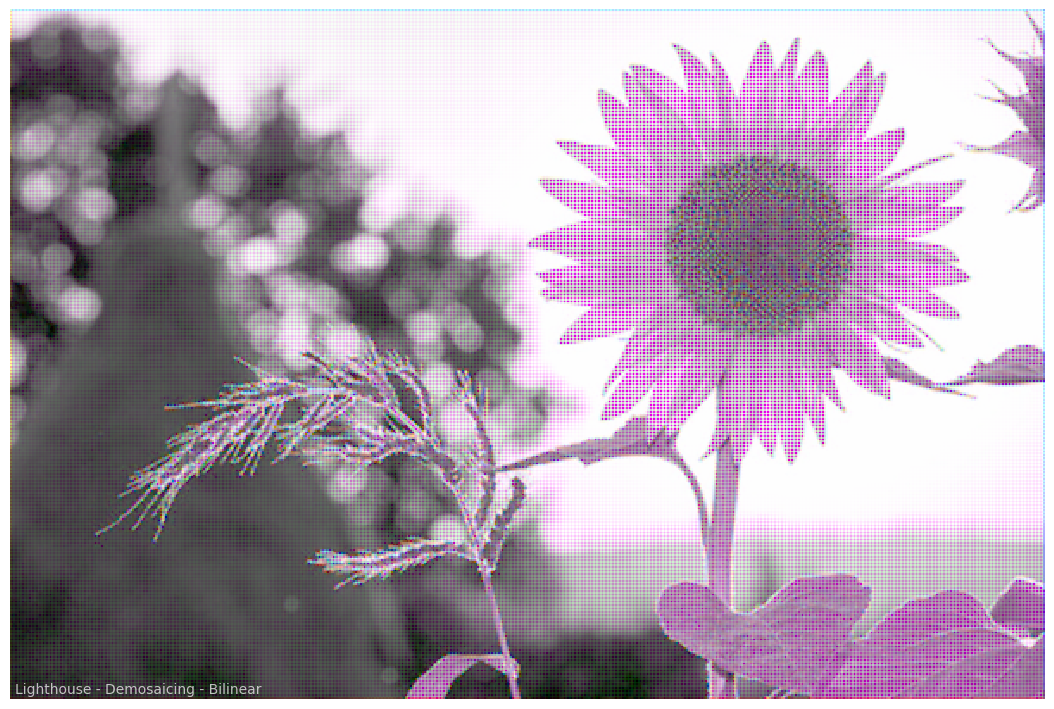

In [31]:
bil_gbrg = demosaicing_CFA_Bayer_bilinear(CFA,"GBRG")

colour.plotting.plot_image(
    colour.cctf_encoding(bil_gbrg), 
    text_kwargs={'text': 'Lighthouse - Demosaicing - Bilinear'});

In [32]:
mse_gbrg = mse(LIGHTHOUSE_IMAGE, bil_gbrg)
print(mse_gbrg)

0.132550337123


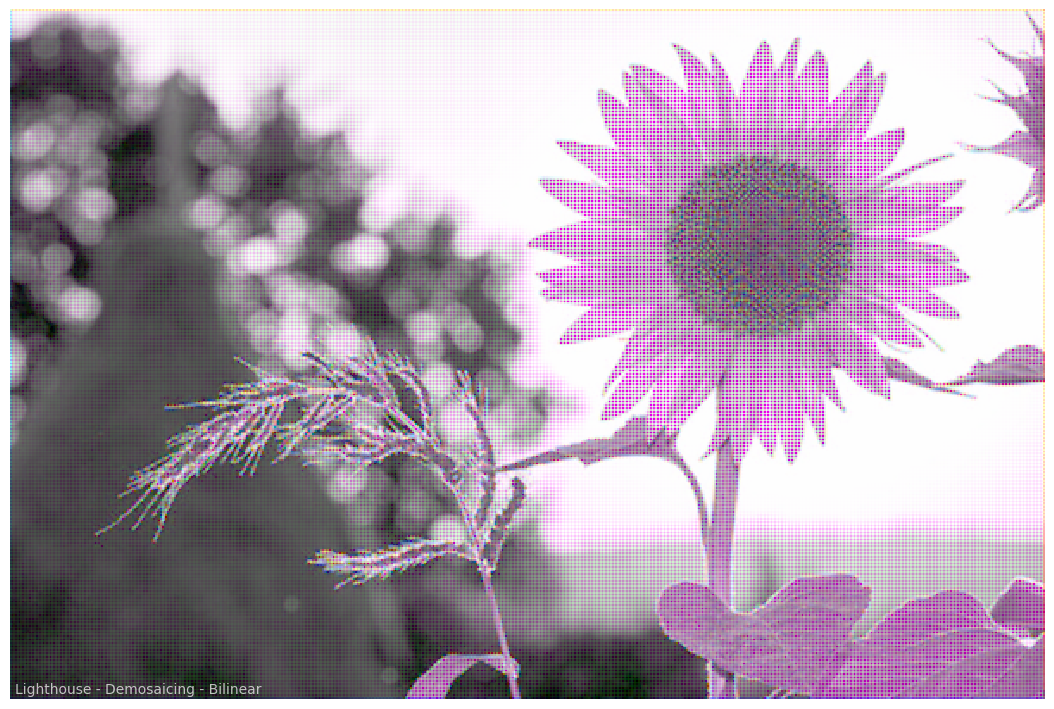

In [33]:
bil_grbg = demosaicing_CFA_Bayer_bilinear(CFA,"GRBG")

colour.plotting.plot_image(
    colour.cctf_encoding(bil_grbg), 
    text_kwargs={'text': 'Lighthouse - Demosaicing - Bilinear'});

In [34]:
mse_grbg = mse(LIGHTHOUSE_IMAGE, bil_grbg)
print(mse_grbg)

0.131520068115


## Demosaicing - Malvar (2004)

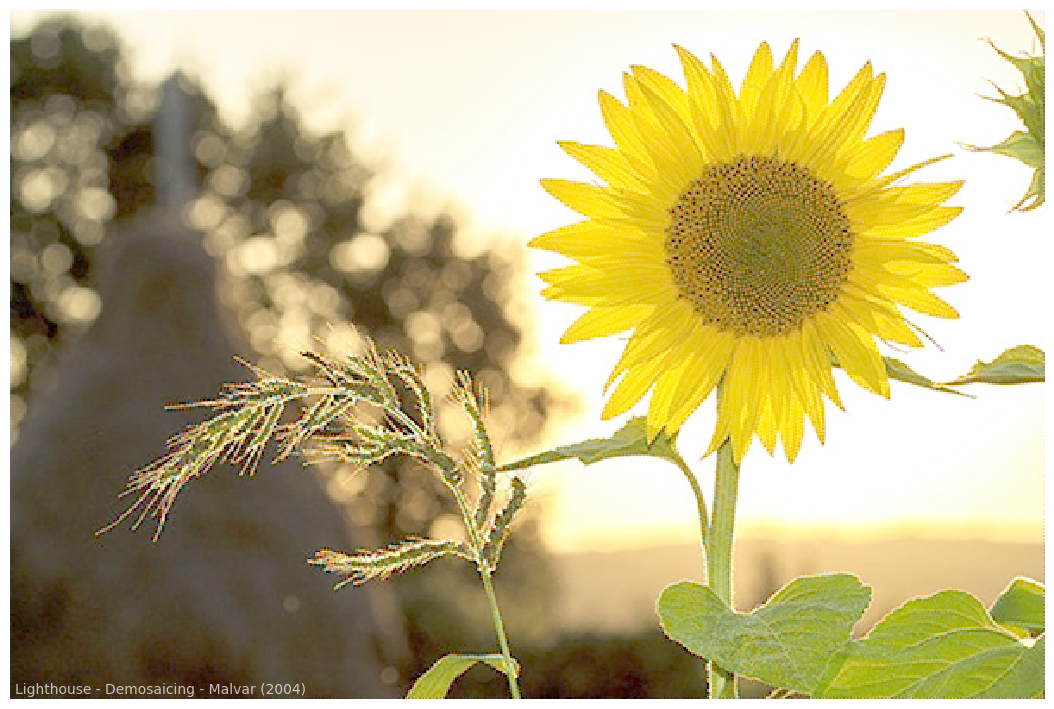

In [35]:
colour.plotting.plot_image(
    colour.cctf_encoding(demosaicing_CFA_Bayer_Malvar2004(CFA)), 
    text_kwargs={'text': 'Lighthouse - Demosaicing - Malvar (2004)'});

## Demosaicing - Menon (2007)

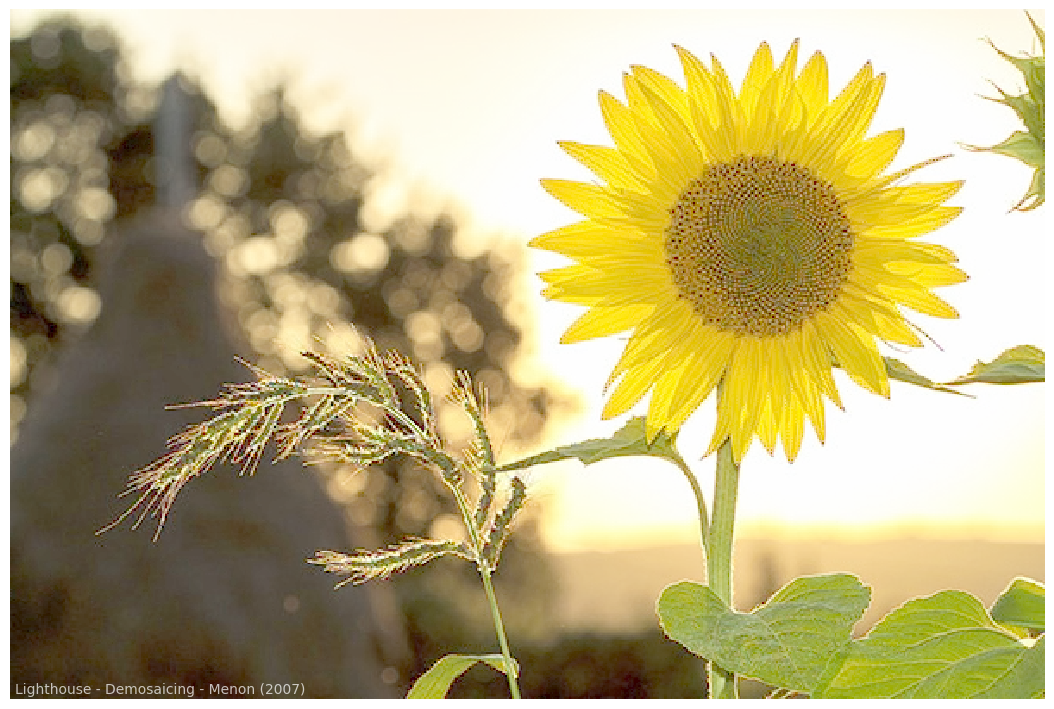

In [36]:
colour.plotting.plot_image(
    colour.cctf_encoding(demosaicing_CFA_Bayer_Menon2007(CFA)), 
    text_kwargs={'text': 'Lighthouse - Demosaicing - Menon (2007)'});